In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import cv2
import random
import joblib
import numpy as np
import pandas as pd
import tensorflow as tf
import functools, operator
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [3]:
import pandas as pd
df = pd.read_csv('drive/MyDrive/IT416/data.csv')
df

,VideoID,Description
0,-4wsuPCjDBc_5_15,a squirrel is eating a peanut in it s shell
1,-4wsuPCjDBc_5_15,a chipmunk is eating
2,-4wsuPCjDBc_5_15,a chipmunk is eating a peanut
3,-4wsuPCjDBc_5_15,a chipmunk is eating a nut
4,-4wsuPCjDBc_5_15,a squirrel is eating a nut
...,...,...
80783,zxB4dFJhHR8_1_9,a girl riding a bicycle
80784,zxB4dFJhHR8_1_9,a smiling girl wearing backpack is riding a bike
80785,zxB4dFJhHR8_1_9,the girl rode her bike at the beach
80786,zzit5b_-ukg_5_20,a boy is doing exercise by cycle


In [4]:
videoIDs = list(df.VideoID.unique())
print(len(videoIDs))

1970


In [ ]:
def extract_frames_equally_spaced(frames, K):
        n_frames = len(frames)
        splits = np.array_split(range(n_frames), K)
        idx_taken = [s[0] for s in splits]
        sub_frames = []

        for idx in idx_taken:
          sub_frames.append(frames[idx])
        return sub_frames

def pad_frames(frames, limit, jpegs=False):
        last_frame = frames[-1]
        if jpegs:
            frames_padded = frames + [last_frame]*(limit-len(frames))
        else:
            padding = np.asarray([last_frame * 0.]*(limit-len(frames)))
            frames_padded = np.concatenate([frames, padding], axis=0)
        return frames_padded

def video_to_frames(input_loc,K,motion=False):
    cap = cv2.VideoCapture(input_loc)
    
    video_length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT)) - 1
    count = 0

    if motion is True:
      K = max(video_length,50)

    frames=[]
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            continue
        frames.append(frame)
        count = count + 1
        
        if (count > (video_length-1)):
            cap.release()
            break
    if len(frames) < K:
        frames = pad_frames(frames,K,True)
    else:
        frames = extract_frames_equally_spaced(frames,K)
    
    return frames

def resize_frames(frames):
  new_frames = []
  for frame in frames:
    new_frame = cv2.resize(frame,(224,224))
    new_frames.append(new_frame)
  
  return new_frames

K=28

In [ ]:
#Googlenet model
def get_model():
  i = tf.keras.layers.Input([224, 224, 3], dtype = tf.float32)
  x = tf.keras.applications.inception_v3.preprocess_input(i)
  model = InceptionV3(weights="imagenet", include_top=False, input_shape=(224, 224, 3),pooling='avg')
  out = model(x)
  model=tf.keras.models.Model(inputs=[i], outputs=out)
  return model
  # model.summary()

In [ ]:
#Extract global features for training 

def extract_global_features(save=False):
  if not os.path.exists('global_features'):
    os.makedirs('global_features')

  model = get_model()

  for index, id in enumerate(videoIDs):
    path = 'drive/MyDrive/it416/YouTubeClips/'
    path+=id
    path+='.avi'

    frames = video_to_frames(path,K)
    frames = resize_frames(frames)
    frames = np.array(frames)

    feature_vector=model.predict(frames,batch_size=128)
    feature_path='global_features/'+id+'.npy'
    np.save(feature_path, feature_vector)

    print(index,':',id)

  if save is True:
    !zip -r global_features.zip global_features
    !cp 'global_features.zip' 'drive/MyDrive/it416/'

In [ ]:
extract_global_features(save=True)

0 : -4wsuPCjDBc_5_15
1 : -7KMZQEsJW4_205_208
2 : -8y1Q0rA3n8_108_115
3 : -8y1Q0rA3n8_95_102
4 : -9CUm-2cui8_39_44
5 : -AwoiGR6c8M_10_14
6 : -Cv5LsqKUXc_17_25
7 : -Cv5LsqKUXc_71_76
8 : -DKuLXYoY3g_14_20
9 : -DRy7rBg0IQ_31_37
10 : -FugkxLmGO4_5_16
11 : -Ms9tsWmhyU_80_95
12 : -YI0cxuNcq8_262_272
13 : -_aaMGK6GGw_57_61
14 : -_hbPLsZvvo_172_179
15 : -_hbPLsZvvo_18_25
16 : -_hbPLsZvvo_19_25
17 : -_hbPLsZvvo_19_26
18 : -_hbPLsZvvo_211_219
19 : -_hbPLsZvvo_269_275
20 : -_hbPLsZvvo_288_305
21 : -_hbPLsZvvo_323_328
22 : -_hbPLsZvvo_43_55
23 : -_hbPLsZvvo_49_55
24 : -_hbPLsZvvo_5_8
25 : -bjOB4zS0uE_100_105
26 : -dm-ds5rRaM_44_52
27 : -joBOHlg5J0_72_80
28 : -mAoVOhKy0c_4_9
29 : -pUwIypksfE_13_23
30 : -rkErLY0rRc_26_35
31 : -rkErLY0rRc_63_67
32 : -rvjK0lE3z4_33_43
33 : -s4-6QTT7HE_235_241
34 : -t-ZWaJeH-o_0_15
35 : -uT_1VDvXok_8_15
36 : -vKO3uSG6Do_3_14
37 : -vg3vR86fu0_1_6
38 : -wa0umYJVGg_100_115
39 : -wa0umYJVGg_117_123
40 : -wa0umYJVGg_139_157
41 : -wa0umYJVGg_168_176
42 : -wa0umYJVGg_23_41
43 

In [ ]:
!pip install sk-video
!wget -O 'c3d.py' 'https://drive.google.com/uc?id=1RC9trsgIo2OsM8dV7CPg73drqSRZMr8j&confirm=t'
!wget -O 'sports1M_utils.py' 'https://drive.google.com/uc?id=1S49OSW2pCUPPD9F-763mG-aBx2gBOr2i&confirm=t'

     |████████████████████████████████| 2.3 MB 12.0 MB/s 
--2022-03-31 12:12:32--  https://drive.google.com/uc?id=1RC9trsgIo2OsM8dV7CPg73drqSRZMr8j&confirm=t
Resolving drive.google.com (drive.google.com)... 142.251.5.113, 142.251.5.102, 142.251.5.138, ...
Connecting to drive.google.com (drive.google.com)|142.251.5.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-20-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/f594vsoqm2h8fpl3nn1u9h2n5c2j9vfb/1648728750000/17228267550831568869/*/1RC9trsgIo2OsM8dV7CPg73drqSRZMr8j [following]
--2022-03-31 12:12:33--  https://doc-0s-20-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/f594vsoqm2h8fpl3nn1u9h2n5c2j9vfb/1648728750000/17228267550831568869/*/1RC9trsgIo2OsM8dV7CPg73drqSRZMr8j
Resolving doc-0s-20-docs.googleusercontent.com (doc-0s-20-docs.googleusercontent.com)... 74.125.140.132, 2a00:1450:400c:c08::84
Connecting to doc-0s-20-docs.googleuserc

In [ ]:
# Extracting Motion Features
import skvideo.io
import importlib as imp
from c3d import C3D
from keras.models import Model
import sports1M_utils
imp.reload(sports1M_utils)

def extract_motion_features(save=False):
  if not os.path.exists('motion_features1'):
    os.makedirs('motion_features1')

  base_model = C3D(weights='sports1M')
  model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc6').output)

  for index, id in enumerate(videoIDs[1600:]):
    path = 'drive/MyDrive/IT416/YouTubeClips/'
    path+=id
    path+='.avi'


    frames = video_to_frames(path,K,True)
    frames = resize_frames(frames)
    frames = np.array(frames)

    windows = []
    org_vid = frames
    vid = []
    motion_features_video = []
    for i in range(len(frames)):
      vid.append(frames[i])
      if i==15:
        windows.append(vid)
      elif i>=16:
        vid.pop(0)
        windows.append(vid)
        
    windows = extract_frames_equally_spaced(windows,28)
    for window in windows:
      x = sports1M_utils.preprocess_input(np.array(window))
      feature_vector = model.predict(x) 
      feature_vector = feature_vector[0]
      feature_vector = np.array(feature_vector)

      motion_features_video.append(feature_vector)
    motion_features_video = np.array(motion_features_video)
    
    path='motion_features1/'+id+'.npy'
    np.save(path, motion_features_video)

    if index%200==0 and index>0:
      !zip -r motion_features1.zip motion_features1
      !cp 'motion_features1.zip' 'drive/MyDrive/IT416/'
    print(index,':',motion_features_video.shape)

  if save is True:
    !zip -r motion_features1.zip motion_features1
    !cp 'motion_features1.zip' 'drive/MyDrive/IT416/'

In [ ]:
extract_motion_features(save=True)

8421376/8405088 [==============================] - 0s 0us/step
0 : (28, 4096)
1 : (28, 4096)
2 : (28, 4096)
3 : (28, 4096)
4 : (28, 4096)
5 : (28, 4096)
6 : (28, 4096)
7 : (28, 4096)
8 : (28, 4096)
9 : (28, 4096)
10 : (28, 4096)
11 : (28, 4096)
12 : (28, 4096)
13 : (28, 4096)
14 : (28, 4096)
15 : (28, 4096)
16 : (28, 4096)
17 : (28, 4096)
18 : (28, 4096)
19 : (28, 4096)
20 : (28, 4096)
21 : (28, 4096)
22 : (28, 4096)
23 : (28, 4096)
24 : (28, 4096)
25 : (28, 4096)
26 : (28, 4096)
27 : (28, 4096)
28 : (28, 4096)
29 : (28, 4096)
30 : (28, 4096)
31 : (28, 4096)
32 : (28, 4096)
33 : (28, 4096)
34 : (28, 4096)
35 : (28, 4096)
36 : (28, 4096)
37 : (28, 4096)
38 : (28, 4096)
39 : (28, 4096)
40 : (28, 4096)
41 : (28, 4096)
42 : (28, 4096)
43 : (28, 4096)
44 : (28, 4096)
45 : (28, 4096)
46 : (28, 4096)
47 : (28, 4096)
48 : (28, 4096)
49 : (28, 4096)
50 : (28, 4096)
51 : (28, 4096)
52 : (28, 4096)
53 : (28, 4096)
54 : (28, 4096)
55 : (28, 4096)
56 : (28, 4096)
57 : (28, 4096)
58 : (28, 4096)
59 

IndexError: ignored

In [ ]:
!unzip '/content/drive/MyDrive/IT416/global_features.zip'

Archive:  /content/drive/MyDrive/IT416/global_features.zip
   creating: global_features/
  inflating: global_features/hSgGBHbJrmE_0_17.npy  
  inflating: global_features/IiIiY6o-C9k_59_64.npy  
  inflating: global_features/MSrJTeKNzdI_32_36.npy  
  inflating: global_features/HAjwXjwN9-A_16_24.npy  
  inflating: global_features/ZxqkAGNyo8A_12_22.npy  
  inflating: global_features/DN7jwyL1Xgg_1_19.npy  
  inflating: global_features/kWLNZzuo3do_262_270.npy  
  inflating: global_features/MTjrZthHwJQ_2_11.npy  
  inflating: global_features/z1PEyzk4ADU_8_18.npy  
  inflating: global_features/GnwKcpfr_ng_10_20.npy  
  inflating: global_features/WTf5EgVY5uU_100_104.npy  
  inflating: global_features/yg4aNiO1JnI_111_114.npy  
  inflating: global_features/YmXCfQm0_CA_277_284.npy  
  inflating: global_features/b97TK8XVLHE_40_50.npy  
  inflating: global_features/wkgGxsuNVSg_34_41.npy  
  inflating: global_features/ItFqogTmAvQ_281_286.npy  
  inflating: global_features/TxzxPyfsSxY_0_10.npy  
  inf

In [ ]:
!unzip '/content/drive/MyDrive/IT416/motion_features.zip'

Archive:  /content/drive/MyDrive/IT416/motion_features.zip
   creating: motion_features/
  inflating: motion_features/nau1vCzyFQ4_37_54.npy  
  inflating: motion_features/nb12bAaKzvA_0_10.npy  
  inflating: motion_features/-8y1Q0rA3n8_95_102.npy  
  inflating: motion_features/-8y1Q0rA3n8_108_115.npy  
  inflating: motion_features/-9CUm-2cui8_39_44.npy  
  inflating: motion_features/0lh_UWF9ZP4_94_103.npy  
  inflating: motion_features/2YhDTpzxd3c_174_180.npy  
  inflating: motion_features/-bjOB4zS0uE_100_105.npy  
  inflating: motion_features/-Cv5LsqKUXc_71_76.npy  
  inflating: motion_features/0lh_UWF9ZP4_50_60.npy  
  inflating: motion_features/0hyZ__3YhZc_632_637.npy  
  inflating: motion_features/0hyZ__3YhZc_380_384.npy  
  inflating: motion_features/0hyZ__3YhZc_289_295.npy  
  inflating: motion_features/06CbMa0kDr8_3_13.npy  
  inflating: motion_features/30GeJHYoerk_80_85.npy  
  inflating: motion_features/-mAoVOhKy0c_4_9.npy  
  inflating: motion_features/1dYpcVv6n3Y_0_18.npy  
 

In [ ]:
!unzip '/content/drive/MyDrive/IT416/local_features.zip'

Archive:  /content/drive/MyDrive/IT416/local_features.zip
   creating: local_features/
  inflating: local_features/_O9kWD8nuRU_37_43.npy  
  inflating: local_features/fVWUaH2mCt4_1_7.npy  
  inflating: local_features/4ge5_V-xhP0_35_42.npy  
  inflating: local_features/YmXCfQm0_CA_140_156.npy  
  inflating: local_features/HJHPB_Y8GZE_22_28.npy  
  inflating: local_features/Ted3imMggC0_48_58.npy  
  inflating: local_features/Zoz0HcCB1vU_0_10.npy  
  inflating: local_features/EiylMb_mWk4_2_20.npy  
  inflating: local_features/6q1dX6thX3E_286_295.npy  
  inflating: local_features/PHDmVhShE80_36_46.npy  
  inflating: local_features/l5JJ2n2ggiQ_319_327.npy  
  inflating: local_features/qypmR4O1Gwk_0_10.npy  
  inflating: local_features/BLXzfdNmydQ_151_156.npy  
  inflating: local_features/fr9H1WLcF1A_326_336.npy  
  inflating: local_features/1RchFBCT9JU_43_53.npy  
  inflating: local_features/vub04F8CWng_32_41.npy  
  inflating: local_features/RMznbCn5sQs_0_10.npy  
  inflating: local_featur

In [ ]:
#Prepare training and validation data
df = pd.read_csv('drive/MyDrive/IT416/data.csv')
train_ids = videoIDs[:1870]
train_split = 0.85
train_list=[]
vocab_list=[]
for i in range(len(train_ids)):
  df_temp=df.loc[df['VideoID']==train_ids[i]]
  for _, row in df_temp.iterrows():
    caption = "<bos> " + row['Description'] + " <eos>"
    if len(caption.split()) > 10 or len(caption.split()) < 6:
        continue
    else:
        train_list.append([caption, train_ids[i]])
random.shuffle(train_list)
training_list = train_list[:int(len(train_list)*train_split)]
validation_list = train_list[int(len(train_list)*train_split):]

for train in training_list:
    vocab_list.append(train[0])
tokenizer = Tokenizer(num_words=1500)
tokenizer.fit_on_texts(vocab_list)

In [ ]:
x_data_global={}
for i,id in enumerate(train_ids):
  feat_path = 'global_features/'+id+'.npy'
  features=np.load(feat_path)
  x_data_global[id]=features
print(len(x_data_global))

1870


In [ ]:
x_data_motion={}
for i,id in enumerate(train_ids):
  feat_path = 'motion_features/'+id+'.npy'
  features=np.load(feat_path)
  x_data_motion[id]=features
print(len(x_data_motion))

1870


In [ ]:
x_data_local={}
for i,id in enumerate(train_ids):
  feat_path = 'local_features/'+id+'.npy'
  features=np.load(feat_path)
  x_data_local[id]=features
print(len(x_data_local))

1870


In [ ]:
import warnings
warnings.filterwarnings("ignore")
tf.get_logger().setLevel('ERROR')

# Hyperparameters
time_steps_encoder=28
num_encoder_tokens=2048
latent_dim=512
time_steps_decoder=10
num_decoder_tokens=1500
batch_size=320
epochs = 25
save_model_path = 'model_final'

#Data generator for loading data in batches while training
def load_dataset(training_list):
  encoder_input_data_global = []
  encoder_input_data_motion = []
  encoder_input_data_local = []
  decoder_input_data = []
  decoder_target_data = []
  train_videoIDs = []
  videoSeq = []
  for idx, cap in enumerate(training_list):
    caption = cap[0]
    train_videoIDs.append(cap[1])
    videoSeq.append(caption)
  train_sequences = tokenizer.texts_to_sequences(videoSeq)
  train_sequences = np.array(train_sequences)
  train_sequences = pad_sequences(train_sequences, padding='post', truncating='post',
                                  maxlen=10)
  file_size = len(train_sequences)
  n = 0
  for i in range(epochs): #epochs
    for idx in range(0, file_size):
      n += 1
      encoder_input_data_global.append(x_data_global[train_videoIDs[idx]])
      encoder_input_data_motion.append(x_data_motion[train_videoIDs[idx]])
      encoder_input_data_local.append(x_data_local[train_videoIDs[idx]])
      y = tf.keras.utils.to_categorical(train_sequences[idx], 1500)
      decoder_input_data.append(y[:-1])
      decoder_target_data.append(y[1:])
      if n == batch_size: #batch size
        encoder_input_global = np.array(encoder_input_data_global)
        encoder_input_motion = np.array(encoder_input_data_motion)
        encoder_input_local = np.array(encoder_input_data_local)
        decoder_input = np.array(decoder_input_data)
        decoder_target = np.array(decoder_target_data)
        encoder_input_data_global = []
        encoder_input_data_motion = []
        encoder_input_data_local = []
        decoder_input_data = []
        decoder_target_data = []
        n = 0
        yield ([encoder_input_global, encoder_input_motion, encoder_input_local, decoder_input], decoder_target)

In [ ]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras import backend as K
class attention(tf.keras.layers.Layer):
    
    def __init__(self, return_sequences=True,**kwargs):
        self.return_sequences = return_sequences
        super(attention,self).__init__()

    def get_config(self):
      config = super().get_config().copy()
      config.update({
          'return_sequences': self.return_sequences 
      })
      return config
        
    def build(self, input_shape):
        
        self.W=self.add_weight(name="att_weight", shape=(input_shape[-1],1),
                               initializer="normal")
        self.b=self.add_weight(name="att_bias", shape=(input_shape[1],1),
                               initializer="zeros")
        
        super(attention,self).build(input_shape)
        
    def call(self, x):
        
        e = K.tanh(K.dot(x,self.W)+self.b)
        a = K.softmax(e, axis=1)
        output = x*a
        
        if self.return_sequences:
            return output
        
        return K.sum(output, axis=1)

In [ ]:
# Model training
def train_model():
  encoder_inputs_global = tf.keras.layers.Input(shape=(time_steps_encoder, 2048), name="encoder_inputs_global")
  encoder_inputs_motion = tf.keras.layers.Input(shape=(time_steps_encoder, 4096), name="encoder_inputs_motion")
  encoder_inputs_local = tf.keras.layers.Input(shape=(time_steps_encoder, 4096), name="encoder_inputs_local")

  encoder_inputs = tf.keras.layers.Concatenate(axis=2)([encoder_inputs_global, encoder_inputs_motion, encoder_inputs_local])

  encoder = tf.keras.layers.LSTM(latent_dim, return_state=True, return_sequences=True, name='encoder_lstm1')
  encoder_seq_output, state_h, state_c = encoder(encoder_inputs)

  attention_output = attention(return_sequences=True, name='attention')(encoder_seq_output)

  encoder = tf.keras.layers.LSTM(latent_dim, return_state=True, return_sequences=True, name='encoder_lstm2')
  _, state_h_1, state_c_1 = encoder(attention_output)
  encoder_states = [state_h_1,state_c_1]

  # encoder_states = [state_h]

  decoder_inputs = tf.keras.layers.Input(shape=(time_steps_decoder, num_decoder_tokens), name="decoder_inputs")
  decoder_lstm = tf.keras.layers.LSTM(latent_dim, return_sequences=True, return_state=True, name='decoder_lstm')
  decoder_outputs, _ , _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)
  decoder_outputs = tf.keras.layers.Dropout(0.3)(decoder_outputs)
  decoder_dense = tf.keras.layers.Dense(num_decoder_tokens, activation='sigmoid', name='decoder_sigmoid')
  decoder_outputs = decoder_dense(decoder_outputs)

  model = tf.keras.models.Model([encoder_inputs_global,encoder_inputs_motion, encoder_inputs_local, decoder_inputs], decoder_outputs)
  # model.summary()
  # training_list, validation_list = preprocessing()

  train = load_dataset(training_list)
  valid = load_dataset(validation_list)

  # early_stopping = EarlyStopping(monitor='val_loss', patience=4, verbose=1, mode='min')

  # Run training
  opt = tf.keras.optimizers.Adam(learning_rate=0.0003)
  reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                factor=0.1, patience=5, verbose=1,
                                                mode="auto")
  model.compile(metrics=['accuracy'], optimizer=opt, loss='categorical_crossentropy')

  validation_steps = len(validation_list)//batch_size
  steps_per_epoch = len(training_list)//batch_size

  history=model.fit(train, validation_data=valid, validation_steps=validation_steps,
            epochs=epochs, steps_per_epoch=steps_per_epoch,
            callbacks=[reduce_lr])

  if not os.path.exists(save_model_path):
      os.makedirs(save_model_path)

  encoder_model = tf.keras.models.Model(encoder_inputs, encoder_states)
  decoder_state_input_h = tf.keras.layers.Input(shape=(latent_dim,))
  decoder_state_input_c = tf.keras.layers.Input(shape=(latent_dim,))
  decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
  decoder_outputs, state_h, state_c = decoder_lstm(
      decoder_inputs, initial_state=decoder_states_inputs)
  decoder_states = [state_h, state_c]
  decoder_outputs = decoder_dense(decoder_outputs)
  decoder_model = tf.keras.models.Model(
      [decoder_inputs] + decoder_states_inputs,
      [decoder_outputs] + decoder_states)
  # encoder_model.summary()
  # decoder_model.summary()

  # saving the models
  encoder_model.save(os.path.join(save_model_path, 'encoder_model.h5'))
  decoder_model.save_weights(os.path.join(save_model_path, 'decoder_model_weights.h5'))
  with open(os.path.join(save_model_path, 'tokenizer' + str(num_decoder_tokens)), 'wb') as file:
      joblib.dump(tokenizer, file)
  
  return history

history = train_model()

Epoch 1/25
152/152 [==============================] - 141s 884ms/step - loss: 3.5840 - accuracy: 0.4018 - val_loss: 3.0289 - val_accuracy: 0.4467 - lr: 3.0000e-04
Epoch 2/25
152/152 [==============================] - 132s 868ms/step - loss: 2.9995 - accuracy: 0.4674 - val_loss: 2.8693 - val_accuracy: 0.5173 - lr: 3.0000e-04
Epoch 3/25
152/152 [==============================] - 131s 864ms/step - loss: 2.8501 - accuracy: 0.5156 - val_loss: 2.7408 - val_accuracy: 0.5366 - lr: 3.0000e-04
Epoch 4/25
152/152 [==============================] - 131s 860ms/step - loss: 2.7217 - accuracy: 0.5402 - val_loss: 2.6236 - val_accuracy: 0.5538 - lr: 3.0000e-04
Epoch 5/25
152/152 [==============================] - 130s 853ms/step - loss: 2.6082 - accuracy: 0.5552 - val_loss: 2.5200 - val_accuracy: 0.5674 - lr: 3.0000e-04
Epoch 6/25
152/152 [==============================] - 130s 853ms/step - loss: 2.4865 - accuracy: 0.5671 - val_loss: 2.3887 - val_accuracy: 0.5746 - lr: 3.0000e-04
Epoch 7/25
152/152 [==

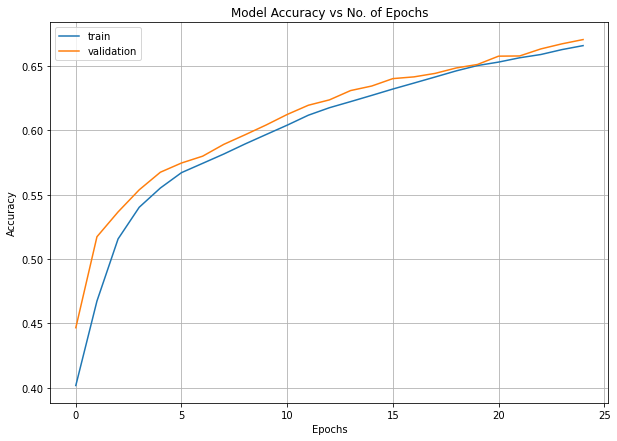

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.grid(True)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy vs No. of Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

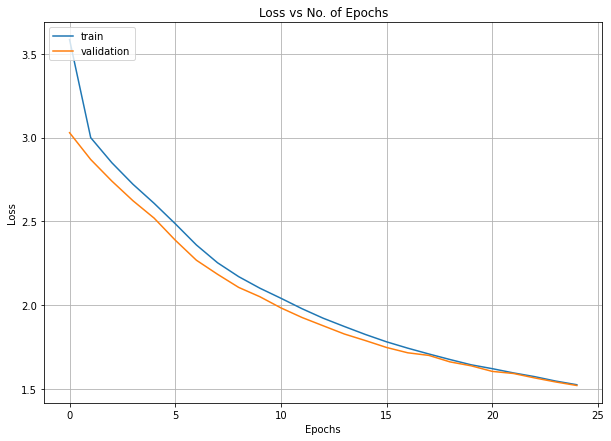

In [ ]:
plt.figure(figsize=(10,7))
plt.grid(True)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs No. of Epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
file = open('testing_id.txt','w')
for id in videoIDs[-100:]:
  print(id,file=file)
file.close()

In [ ]:
# !unzip 'drive/MyDrive/IT416/model_gru.zip'

Archive:  drive/MyDrive/IT416/model_gru.zip
   creating: model_gru/
 extracting: model_gru/test_output.txt  
  inflating: model_gru/tokenizer1500  
  inflating: model_gru/encoder_model.h5  
  inflating: model_gru/decoder_model_weights.h5  


In [ ]:
# class to perform inference on all test files and save as test_output.txt
class Video2Text(object):
    ''' Initialize the parameters for the model '''
    def __init__(self):
        self.latent_dim = 512
        self.num_encoder_tokens = 2048
        self.num_decoder_tokens = 1500
        self.time_steps_encoder = 28
        self.time_steps_decoder = None
        self.max_probability = -1

        # processed data
        self.encoder_input_data = []
        self.decoder_input_data = []
        self.decoder_target_data = []
        self.tokenizer = None

        # models
        self.encoder_model = None
        self.decoder_model = None
        self.inf_encoder_model = None
        self.inf_decoder_model = None
        self.save_model_path = 'model_final'
        self.test_path_global = 'global_features'
        self.test_path_motion = 'motion_features'
        self.test_path_local = 'local_features'

    def load_inference_models(self):
        # load tokenizer
        with open(os.path.join(self.save_model_path, 'tokenizer' + str(self.num_decoder_tokens)), 'rb') as file:
            self.tokenizer = joblib.load(file)

        # inference encoder model
        self.inf_encoder_model = tf.keras.models.load_model(os.path.join(self.save_model_path, 'encoder_model.h5'),custom_objects={'attention':attention})

        # inference decoder model
        decoder_inputs = tf.keras.layers.Input(shape=(None, self.num_decoder_tokens))
        decoder_dense = tf.keras.layers.Dense(self.num_decoder_tokens, activation='softmax')
        
        decoder_lstm = tf.keras.layers.LSTM(self.latent_dim, return_sequences=True, return_state=True)
        decoder_state_input_h = tf.keras.layers.Input(shape=(self.latent_dim,))
        decoder_state_input_c = tf.keras.layers.Input(shape=(self.latent_dim,))
        decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
        decoder_outputs, state_h, state_c = decoder_lstm(decoder_inputs, initial_state=decoder_states_inputs)
        decoder_states = [state_h, state_c]
        decoder_outputs = decoder_dense(decoder_outputs)
        self.inf_decoder_model = tf.keras.models.Model(
            [decoder_inputs] + decoder_states_inputs,
            [decoder_outputs] + decoder_states)

        self.inf_decoder_model.load_weights(os.path.join(self.save_model_path, 'decoder_model_weights.h5'))
        print('Loaded Inference Model')

    
    def index_to_word(self):
        # inverts word tokenizer
        index_to_word = {value: key for key, value in self.tokenizer.word_index.items()}
        return index_to_word
    
    def greedy_search(self, f):
        """
        :param f: the loaded numpy array after creating videos to frames and extracting features
        :return: the final sentence which has been predicted greedily
        """
        inv_map = self.index_to_word()
        states_value = self.inf_encoder_model.predict(f.reshape(-1, 28, 10240))
        # states_value = np.array(states_value).reshape((1, 512))
        target_seq = np.zeros((1, 1, 1500))
        sentence = ''
        target_seq[0, 0, self.tokenizer.word_index['bos']] = 1
        for i in range(15):
            output_tokens, h, c = self.inf_decoder_model.predict([target_seq] + [states_value])
            states_value = [h, c]
            output_tokens = output_tokens.reshape(self.num_decoder_tokens)
            y_hat = np.argmax(output_tokens)
            if y_hat == 0:
                continue
            if inv_map[y_hat] is None:
                break
            else:
                sentence = sentence + inv_map[y_hat] + ' '
                target_seq = np.zeros((1, 1, 1500))
                target_seq[0, 0, y_hat] = 1
        return ' '.join(sentence.split()[:-1])

    def decode_sequence2bs(self, input_seq):
        states_value = self.inf_encoder_model.predict(input_seq)
        target_seq = np.zeros((1, 1, self.num_decoder_tokens))
        target_seq[0, 0, self.tokenizer.word_index['bos']] = 1
        self.beam_search(target_seq, states_value,[],[],0)
        return decode_seq

    def beam_search(self, target_seq, states_value, prob,  path, lens):
        global decode_seq
        node = 2
        output_tokens, h, c = self.inf_decoder_model.predict(
            [target_seq] + states_value)
        output_tokens = output_tokens.reshape((self.num_decoder_tokens))
        sampled_token_index = output_tokens.argsort()[-node:][::-1]
        states_value = [h, c]
        for i in range(node):
            if sampled_token_index[i] == 0:
                sampled_char = ''
            else:
                sampled_char = list(self.tokenizer.word_index.keys())[list(self.tokenizer.word_index.values()).index(sampled_token_index[i])]
            MAX_LEN = 10
            if(sampled_char != 'eos' and lens <= MAX_LEN):
                p = output_tokens[sampled_token_index[i]]
                if(sampled_char == ''):
                    p = 1
                prob_new = list(prob)
                prob_new.append(p)
                path_new = list(path)
                path_new.append(sampled_char)
                target_seq = np.zeros((1, 1, self.num_decoder_tokens))
                target_seq[0, 0, sampled_token_index[i]] = 1.
                self.beam_search(target_seq, states_value, prob_new, path_new, lens+1)
            else:
                p = output_tokens[sampled_token_index[i]]
                prob_new = list(prob)
                prob_new.append(p)
                p = functools.reduce(operator.mul, prob_new, 1)
                if(p > self.max_probability):
                    decode_seq = path
                    self.max_probability = p

    def decoded_sentence_tuning(self, decoded_sentence):
        decode_str = []
        filter_string = ['bos', 'eos']
        unigram = {}
        last_string = ""
        for idx2, c in enumerate(decoded_sentence):
            if c in unigram:
                unigram[c] += 1
            else:
                unigram[c] = 1
            if(last_string == c and idx2 > 0):
                continue
            if c in filter_string:
                continue
            if len(c) > 0:
                decode_str.append(c)
            if idx2 > 0:
                last_string = c
        return decode_str

    def get_test_data(self, path_global, path_motion, path_local):
        X_test = []
        X_test_filename = []
        with open('testing_id.txt') as testing_file:
            lines = testing_file.readlines()
            for filename in lines:
                filename = filename.strip()
                f1 = np.load(os.path.join(path_global , filename + '.npy'))
                f2 = np.load(os.path.join(path_motion , filename + '.npy'))
                f3 = np.load(os.path.join(path_local , filename + '.npy'))
                X_test.append(np.concatenate((f1,f2,f3),axis=1))
                X_test_filename.append(filename)
            X_test = np.array(X_test)
            print('X_test.shape:',X_test.shape)
        return X_test, X_test_filename

    def test(self):
        X_test, X_test_filename = self.get_test_data(os.path.join(self.test_path_global),os.path.join(self.test_path_motion),os.path.join(self.test_path_local))
        print(len(X_test), len(X_test_filename))
        # generate inference test outputs
        with open(os.path.join(self.save_model_path, 'test_output.txt'), 'w') as file:
            for idx, x in enumerate(X_test): 
                file.write(X_test_filename[idx]+',')
                # decoded_sentence = self.decode_sequence2bs(x.reshape(-1, 28, 10240))
                # decode_str = self.decoded_sentence_tuning(decoded_sentence)
                # for d in decode_str:
                #     file.write(d + ' ')
              
                decoded_sentence = self.greedy_search(x.reshape(-1, 28, 10240))
                file.write(decoded_sentence)

                file.write('\n')
                # re-init max prob
                self.max_probability = -1

In [ ]:
c = Video2Text()
c.load_inference_models()
c.test()

Loaded Inference Model
X_test.shape: (100, 28, 10240)
100 100


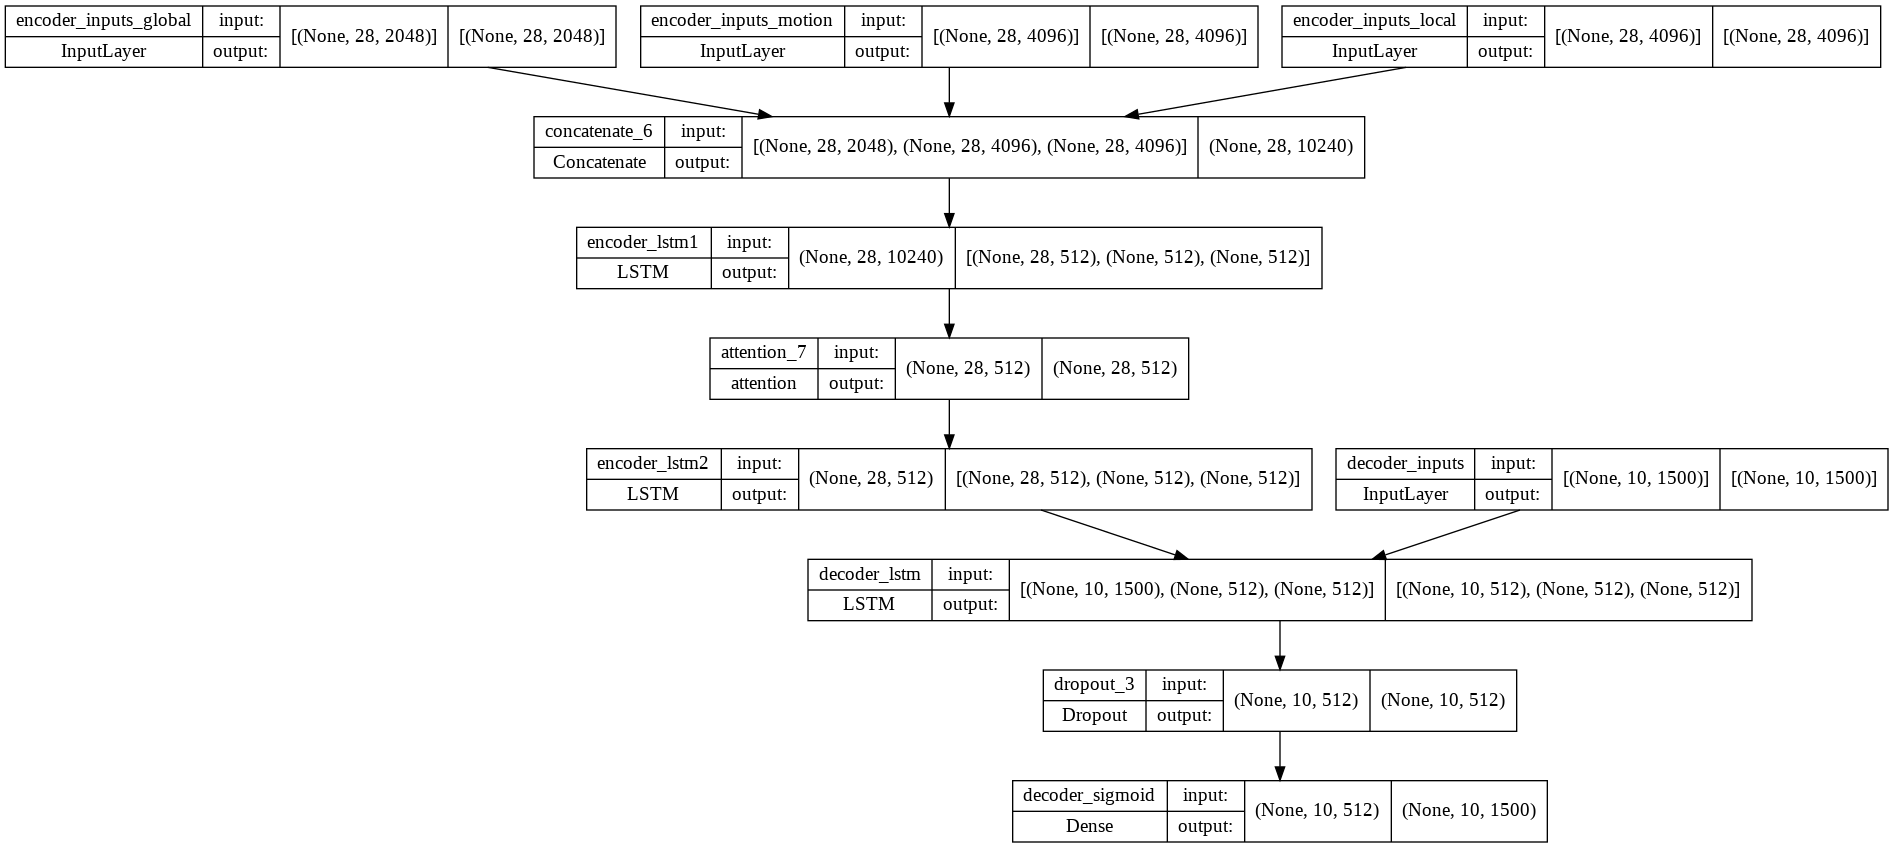

In [ ]:
from keras.utils.vis_utils import plot_model
encoder_inputs_global = tf.keras.layers.Input(shape=(time_steps_encoder, 2048), name="encoder_inputs_global")
encoder_inputs_motion = tf.keras.layers.Input(shape=(time_steps_encoder, 4096), name="encoder_inputs_motion")
encoder_inputs_local = tf.keras.layers.Input(shape=(time_steps_encoder, 4096), name="encoder_inputs_local")

encoder_inputs = tf.keras.layers.Concatenate(axis=2)([encoder_inputs_global, encoder_inputs_motion, encoder_inputs_local])

encoder = tf.keras.layers.LSTM(latent_dim, return_state=True, return_sequences=True, name='encoder_lstm1')
encoder_seq_output, state_h, state_c = encoder(encoder_inputs)

attention_output = attention(return_sequences=True, name='attention')(encoder_seq_output)

encoder = tf.keras.layers.LSTM(latent_dim, return_state=True, return_sequences=True, name='encoder_lstm2')
_, state_h_1, state_c_1 = encoder(attention_output)
encoder_states = [state_h_1,state_c_1]

# encoder_states = [state_h]

decoder_inputs = tf.keras.layers.Input(shape=(time_steps_decoder, num_decoder_tokens), name="decoder_inputs")
decoder_lstm = tf.keras.layers.LSTM(latent_dim, return_sequences=True, return_state=True, name='decoder_lstm')
decoder_outputs, _ , _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)
decoder_outputs = tf.keras.layers.Dropout(0.3)(decoder_outputs)
decoder_dense = tf.keras.layers.Dense(num_decoder_tokens, activation='sigmoid', name='decoder_sigmoid')
decoder_outputs = decoder_dense(decoder_outputs)

model = tf.keras.models.Model([encoder_inputs_global,encoder_inputs_motion, encoder_inputs_local, decoder_inputs], decoder_outputs)
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

##Evaluation Metrics

In [6]:
#Prepare training and validation data
df = pd.read_csv('drive/MyDrive/IT416/data.csv')
test_ids = videoIDs[-100:]

references_list=[]
ref_dict={'annotations':[]}
for i in range(len(test_ids)):
  df_temp=df.loc[df['VideoID']==test_ids[i]]
  references=[]
  for _, row in df_temp.iterrows():
    reference = row['Description'].split()
    ref_dict['annotations'].append({u'video_id':i,u'caption':row['Description']})
    references.append(reference)
  references_list.append(references)

print(ref_dict)

{'annotations': [{'video_id': 0, 'caption': 'a man skates a tunnel then falls'}, {'video_id': 0, 'caption': 'a guy hurts himself from falling off his skateboard'}, {'video_id': 0, 'caption': 'a guy is falling off a skateboard'}, {'video_id': 0, 'caption': 'a guy is riding a skateboard on a ramp and falls to the ground'}, {'video_id': 0, 'caption': 'a man is falling when he performs skating stunts'}, {'video_id': 0, 'caption': 'a man is skateboarding and falls'}, {'video_id': 0, 'caption': 'a man is skateboarding'}, {'video_id': 0, 'caption': 'a man with a bruise on his lower back rides a skateboard up a slope'}, {'video_id': 0, 'caption': 'a skatboarder falls down'}, {'video_id': 0, 'caption': 'a skateboarder crashes to the ground'}, {'video_id': 0, 'caption': 'a skateboarder is falling while trying to perform tricks'}, {'video_id': 0, 'caption': 'a skateboarder misses his landing and crashes'}, {'video_id': 0, 'caption': 'the man fell off his skateboard'}, {'video_id': 0, 'caption': '

In [7]:
hypotheses = []
count=0
hyp_dict={'annotations':[]}
with open('test_output.txt','r') as file:
  for line in file:
    vid = line.split(',')[0]
    hyp = line.split(',')[1]
    hyp=hyp.split('\n')[0]
    hypotheses.append(hyp)
    hyp_dict['annotations'].append({u'video_id':count,u'caption':hyp})
    count=count+1

print(hyp_dict)

{'annotations': [{'video_id': 0, 'caption': 'a man is walking on a rope'}, {'video_id': 1, 'caption': 'a baby is laughing'}, {'video_id': 2, 'caption': 'a squirrel is walking in the snow'}, {'video_id': 3, 'caption': 'a man is running down a street'}, {'video_id': 4, 'caption': 'a woman is holding a woman'}, {'video_id': 5, 'caption': 'a woman is cutting a fish'}, {'video_id': 6, 'caption': 'a woman is applying makeup'}, {'video_id': 7, 'caption': 'a cat is jumping from a table'}, {'video_id': 8, 'caption': 'a man is holding a woman'}, {'video_id': 9, 'caption': 'a baby is eating'}, {'video_id': 10, 'caption': 'a man is talking to a man'}, {'video_id': 11, 'caption': 'a monkey is walking in the water'}, {'video_id': 12, 'caption': 'a man is doing exercise'}, {'video_id': 13, 'caption': 'a man is riding a bicycle'}, {'video_id': 14, 'caption': 'a man is riding a bike'}, {'video_id': 15, 'caption': 'a group of people are moving'}, {'video_id': 16, 'caption': 'a man is playing soccer'}, {

In [8]:
!pip install "git+https://github.com/salaniz/pycocoevalcap.git"

  Cloning https://github.com/salaniz/pycocoevalcap.git to /tmp/pip-req-build-0sikl6qs
  Running command git clone -q https://github.com/salaniz/pycocoevalcap.git /tmp/pip-req-build-0sikl6qs
  Created wheel for pycocoevalcap: filename=pycocoevalcap-1.2-py3-none-any.whl size=104312215 sha256=eef70bc85274d81743dffde0bb436143495515b7a6ab162f5222583a75776eb1
  Stored in directory: /tmp/pip-ephem-wheel-cache-gumet4bg/wheels/6f/c9/51/e266f0496048c16686e133d8e33644d692931a356bfb372aae
Successfully built pycocoevalcap


In [9]:
from pycocoevalcap.tokenizer.ptbtokenizer import PTBTokenizer
from pycocoevalcap.bleu.bleu import Bleu
from pycocoevalcap.meteor.meteor import Meteor
from pycocoevalcap.rouge.rouge import Rouge
from pycocoevalcap.cider.cider import Cider

class COCOEvalCap:
    def __init__(self,images,gts,res):
        self.evalImgs = []
        self.eval = {}
        self.imgToEval = {}
        self.params = {'video_id': images}
        self.gts = gts
        self.res = res

    def evaluate(self):
        imgIds = self.params['video_id']
        gts = self.gts
        res = self.res

        # =================================================
        # Set up scorers
        # =================================================
        print('tokenization...')
        tokenizer = PTBTokenizer()
        gts  = tokenizer.tokenize(gts)
        res = tokenizer.tokenize(res)

        # =================================================
        # Set up scorers
        # =================================================
        print('setting up scorers...')
        scorers = [
            (Bleu(4), ["Bleu_1", "Bleu_2", "Bleu_3", "Bleu_4"]),
            (Meteor(),"METEOR"),
            (Rouge(), "ROUGE_L"),
            (Cider(), "CIDEr")
        ]

        # =================================================
        # Compute scores
        # =================================================
        eval = {}
        for scorer, method in scorers:
            print('computing %s score...'%(scorer.method()))
            score, scores = scorer.compute_score(gts, res)
            if type(method) == list:
                for sc, scs, m in zip(score, scores, method):
                    self.setEval(sc, m)
                    self.setImgToEvalImgs(scs, imgIds, m)
                    print("%s: %0.3f"%(m, sc))
            else:
                self.setEval(score, method)
                self.setImgToEvalImgs(scores, imgIds, method)
                print("%s: %0.3f"%(method, score))
        self.setEvalImgs()

    def setEval(self, score, method):
        self.eval[method] = score

    def setImgToEvalImgs(self, scores, imgIds, method):
        for imgId, score in zip(imgIds, scores):
            if not imgId in self.imgToEval:
                self.imgToEval[imgId] = {}
                self.imgToEval[imgId]["video_id"] = imgId
            self.imgToEval[imgId][method] = score

    def setEvalImgs(self):
        self.evalImgs = [eval for imgId, eval in self.imgToEval.items()]

def calculate_metrics(rng,datasetGTS,datasetRES):
    imgIds = rng
    gts = {}
    res = {}

    imgToAnnsGTS = {ann['video_id']: [] for ann in datasetGTS['annotations']}
    for ann in datasetGTS['annotations']:
        imgToAnnsGTS[ann['video_id']] += [ann]

    imgToAnnsRES = {ann['video_id']: [] for ann in datasetRES['annotations']}
    for ann in datasetRES['annotations']:
        imgToAnnsRES[ann['video_id']] += [ann]

    for imgId in imgIds:
        gts[imgId] = imgToAnnsGTS[imgId]
        res[imgId] = imgToAnnsRES[imgId]

    evalObj = COCOEvalCap(imgIds,gts,res)
    evalObj.evaluate()
    return evalObj.eval

rng = range(100)
print(calculate_metrics(rng,ref_dict,hyp_dict))

tokenization...
setting up scorers...
computing Bleu score...
{'testlen': 547, 'reflen': 545, 'guess': [547, 447, 347, 247], 'correct': [359, 166, 87, 35]}
ratio: 1.0036697247688007
Bleu_1: 0.656
Bleu_2: 0.494
Bleu_3: 0.394
Bleu_4: 0.305
computing METEOR score...
METEOR: 0.240
computing Rouge score...
ROUGE_L: 0.583
computing CIDEr score...
CIDEr: 0.339
{'Bleu_1': 0.6563071297977033, 'Bleu_2': 0.49368944659395336, 'Bleu_3': 0.39388171631189894, 'Bleu_4': 0.30504726744332133, 'METEOR': 0.23971699142475764, 'ROUGE_L': 0.5830745961774126, 'CIDEr': 0.33948252778358684}
